In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../road_accident_data.csv")

In [5]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  3
dtype: int64


In [6]:
df_cleaned = df.dropna(subset=["Count"])

In [7]:
df_cleaned["Count"] = df_cleaned["Count"].astype(int)

C:\Users\Siddhesh\AppData\Local\Temp\ipykernel_13204\2192297646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Count"] = df_cleaned["Count"].astype(int)


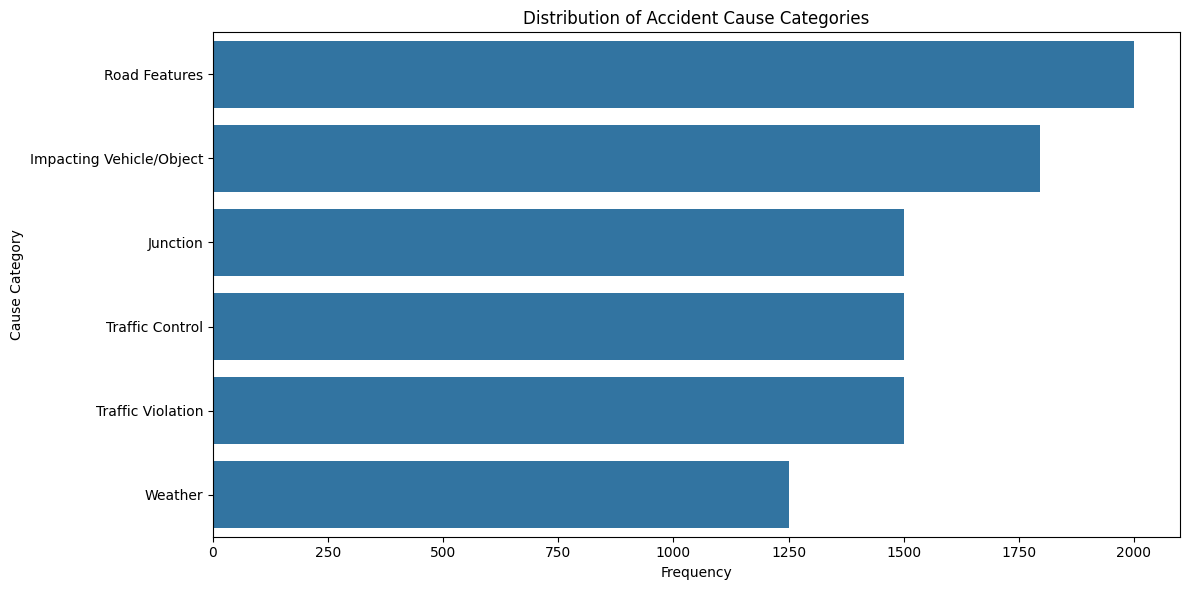

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_cleaned, y="Cause category", order=df_cleaned["Cause category"].value_counts().index)
plt.title("Distribution of Accident Cause Categories")
plt.xlabel("Frequency")
plt.ylabel("Cause Category")
plt.tight_layout()
plt.show()

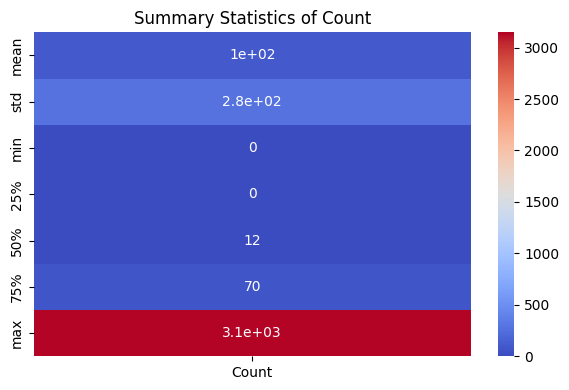

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(df_cleaned[["Count"]].describe()[1:], annot=True, cmap="coolwarm")
plt.title("Summary Statistics of Count")
plt.tight_layout()
plt.show()

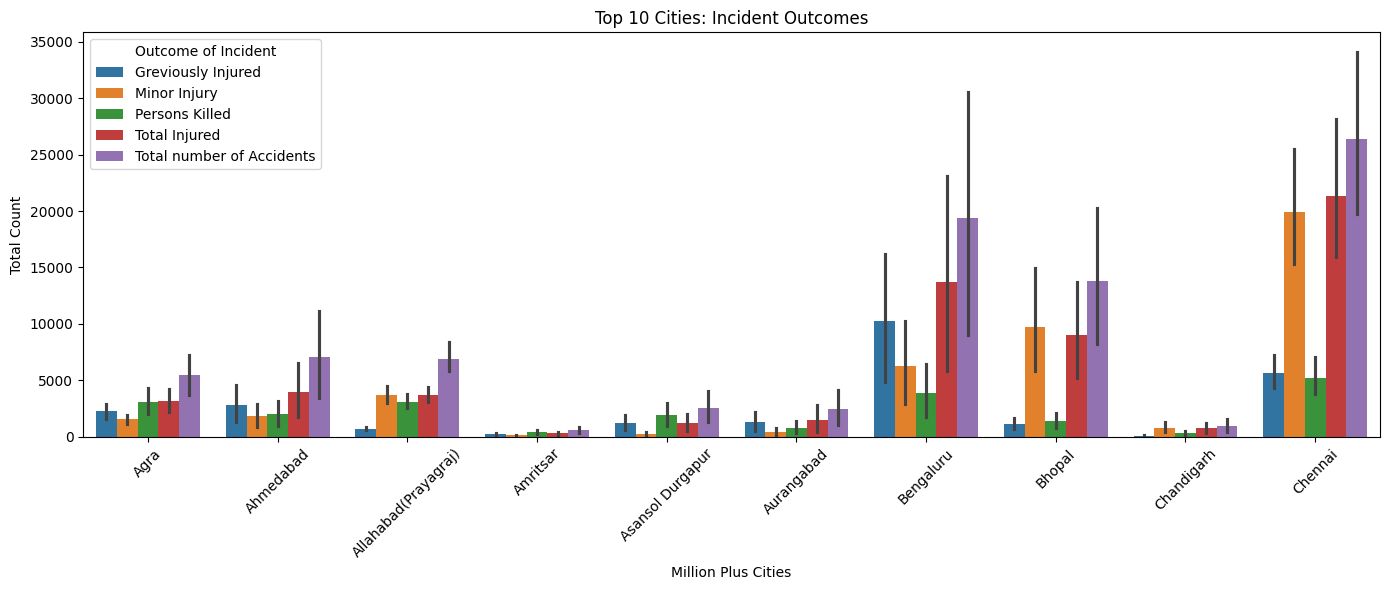

In [10]:
plt.figure(figsize=(14,6))
top_cities = df_cleaned["Million Plus Cities"].value_counts().nlargest(10).index
subset = df_cleaned[df_cleaned["Million Plus Cities"].isin(top_cities)]
sns.barplot(data=subset, x="Million Plus Cities", y="Count", hue="Outcome of Incident", estimator=sum)
plt.title("Top 10 Cities: Incident Outcomes")
plt.ylabel("Total Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()